In [4]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The original plan for this dataset was to use the Statistics Canada API to programatically download all the required data,
# but it turns out that The APIs for various years are very different, and there they don't work well with any data before 2016.
# To avoid any issues here, census data for 2011, 2016, and 2021 have been downloaded as CSV files and will be imported directly.

# Load the 2011, 2016, and 2021 census data for New Brunswick
# Let's start with the most recent year and work our way back
census2021 = pd.read_csv("statCanData/NB_2021_Full.csv", low_memory=False)
# We'll also clean up the 'CHARACTERISTIC_NAME' column to remove whitespace and unknown characters
census2021['CHARACTERISTIC_NAME'] = census2021['CHARACTERISTIC_NAME'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
census2021['CHARACTERISTIC_NAME'] = census2021['CHARACTERISTIC_NAME'].str.strip()

census2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699846 entries, 0 to 699845
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CENSUS_YEAR          699846 non-null  int64  
 1   DGUID                699846 non-null  object 
 2   ALT_GEO_CODE         699846 non-null  int64  
 3   GEO_LEVEL            699846 non-null  object 
 4   GEO_NAME             699846 non-null  object 
 5   TNR_SF               699846 non-null  float64
 6   TNR_LF               699846 non-null  float64
 7   DATA_QUALITY_FLAG    699846 non-null  int64  
 8   CHARACTERISTIC_ID    699846 non-null  int64  
 9   CHARACTERISTIC_NAME  699846 non-null  object 
 10  CHARACTERISTIC_NOTE  74214 non-null   float64
 11  C1_COUNT_TOTAL       672088 non-null  float64
 12  SYMBOL               27775 non-null   object 
 13  C2_COUNT_MEN+        614620 non-null  float64
 14  SYMBOL.1             85226 non-null   object 
 15  C3_COUNT_WOMEN+  

In [5]:
# The 2021 Census has 15 columns. The different attributes are identified
# by the DIM column, which we will look at a bit more closely later
# Next, let's load the 2016 data and compare the two datasets
census2016 = pd.read_csv("statCanData/NB_2016_Full.csv", low_memory=False)
# As before, we'll clean up the data. The import column here is 
# 'DIM: Profile of Census Subdivisions (2247)'. A bit of a mouthful, so let's rename it
# to 'CHARACTERISTIC_NAME' to match the 2021 dataset
census2016.rename(columns={'DIM: Profile of Census Subdivisions (2247)': 'CHARACTERISTIC_NAME'}, inplace=True)
census2016['CHARACTERISTIC_NAME'] = census2016['CHARACTERISTIC_NAME'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
census2016['CHARACTERISTIC_NAME'] = census2016['CHARACTERISTIC_NAME'].str.strip()
census2016.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613431 entries, 0 to 613430
Data columns (total 15 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   CENSUS_YEAR                                       613431 non-null  int64  
 1   GEO_CODE (POR)                                    613431 non-null  int64  
 2   GEO_LEVEL                                         613431 non-null  int64  
 3   GEO_NAME                                          613431 non-null  object 
 4   GNR                                               602196 non-null  float64
 5   GNR_LF                                            602196 non-null  float64
 6   DATA_QUALITY_FLAG                                 613431 non-null  int64  
 7   CSD_TYPE_NAME                                     613431 non-null  object 
 8   ALT_GEO_CODE                                      613431 non-null  int64  
 9   CHAR

In [6]:
# The 2016 Census has 15 columns, the same as the 2021 Census.
# Finally, let's load the 2011 data and compare all three datasets
# Note the file name is different here, because the 2011 data was only available
# as a Canada-wide dataset. We can expect to have to do some work here.
census2011 = pd.read_csv("statCanData/Canada_2011_Full.csv", low_memory=False)
census2011.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479416 entries, 0 to 2479415
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Geo_Code         int64  
 1   Prov_Name        object 
 2   CD_Name          object 
 3   CSD_Name         object 
 4   CSD_Type         object 
 5   Topic            object 
 6   Characteristics  object 
 7   Note             float64
 8   Total            float64
 9   Flag_Total       object 
 10  Male             float64
 11  Flag_Male        object 
 12  Female           float64
 13  Flag_Female      object 
dtypes: float64(4), int64(1), object(9)
memory usage: 264.8+ MB


In [7]:
# Unsurprisingly, the 2011 Census data is a different shape than the other datasets.
# Let's see if we can find some common ground.

# First of all, let's trim the 2011 dataset to only include New Brunswick data
# We can use the 'Prov_Name' column to do this
census2011_nb = census2011[census2011['Prov_Name'] == 'New Brunswick']
# Let's also clean up the values in the 'Characteristics' column, as we did before
census2011_nb['Characteristics'] = census2011_nb['Characteristics'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
census2011_nb['Characteristics'] = census2011_nb['Characteristics'].str.strip()

# Now let's see if there are shared values in some of the key columns. Manual inspection
# of the data indicates that there should be some overlap between the DIM columns of 2016/2021 and the 'Characteristics' column
# of the 2011 dataset. Let's see if this is the case
unique2011 = set(census2011_nb['Characteristics'].unique())
unique2016 = set(census2016['CHARACTERISTIC_NAME'].unique())
unique2021 = set(census2021['CHARACTERISTIC_NAME'].unique())

# We can use the set intersection operator to find the common values between the three datasets
commonValues = unique2011.intersection(unique2016).intersection(unique2021)
# Let's print these out with an entry on each line
print(f'There are {len(commonValues)} common values between the three datasets. They are:')
for value in commonValues:
    print(value)


There are 126 common values between the three datasets. They are:
One-person households
Hungarian
Inuktitut
Private dwellings occupied by usual residents
Romanian
Lithuanian
Malayalam
Swahili
Urdu
60 to 64 years
Armenian
Multiple responses
Serbian
Maltese
Common-law couples
Danish
Korean
Czech
Non-official languages
Married couples
Single-detached house
Mi'kmaq
35 to 39 years
Indo-Iranian languages, n.i.e.
Median age of the population
Turkish
Single responses
Hindi
Cree, n.o.s.
French
Russian
Tigrigna
0 to 4 years
Mandarin
Number of persons in private households
Slovenian
Neither English nor French
Taiwanese
Slavic languages, n.i.e.
Amharic
Chinese, n.o.s.
Flemish
Japanese
Nepali
Serbo-Croatian
Lao
Slovak
Lingala
Dutch
Tamil
Bulgarian
Malay
25 to 29 years
Somali
45 to 49 years
55 to 59 years
80 to 84 years
Marathi
Sinhala (Sinhalese)
30 to 34 years
75 to 79 years
Ilocano
Kurdish
4 persons
Niger-Congo languages, n.i.e.
Oji-Cree
Arabic
Norwegian
Macedonian
Total private dwellings
Akan (T

C:\Users\danes\AppData\Local\Temp\ipykernel_75024\2585270817.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census2011_nb['Characteristics'] = census2011_nb['Characteristics'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
C:\Users\danes\AppData\Local\Temp\ipykernel_75024\2585270817.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census2011_nb['Characteristics'] = census2011_nb['Characteristics'].str.strip()


Looks like we have quite a bit of overlap, but there are a lot of entries for things like spoken language, which we won't be using in our analysis. To keep the scope of this ISP manageable, let's trim the data frames to characters specifically related to population, households, age characteristics, and details related to occupation and employment.

That will mean
 - age characteristics 'n' to 'm' years
 - Private household counts, and counts of each household size (eg. 1 person, 2 persons, etc.)
 - A selection of data related to labour force, employment status and industry of occupation.

Critically, the 2011 data does not include any employment-related data, so we are left to decide between not including employment data, or focusing on the 2016-2021 data sets. Let's focus on the latter two datasets for now. 

In [8]:
# Since we will focus on 2016 and 2021 data, let's compare the common unique values there
commonValuesTrimmed = unique2016.intersection(unique2021)
# Again, let's print these out with an entry on each line
print(f'There are {len(commonValuesTrimmed)} common values between 2016 and 2021:')
for value in commonValuesTrimmed:
    print(value)


There are 771 common values between 2016 and 2021:
Guyana
Bilen
Median monthly shelter costs for rented dwellings ($)
Waray-Waray
Hungarian
With after-tax income
Private dwellings occupied by usual residents
81 Other services (except public administration)
Immigrants
Michif
Kannada
Algeria
Plains Cree
Armenian
52 Finance and insurance
Multiple responses
6 rooms
Total - Tenant households in non-farm, non-reserve private dwellings - 25% sample data
Other places of birth
Education
Lillooet
Cte d'Ivoire
Total - Mobility status 1 year ago - 25% sample data
Haida
Official languages
Between 5 a.m. and 5:59 a.m.
54. History
18 to 64 years
Kazakh
Mi'kmaq
Median age of the population
Bikol
Mtis
45 to 54 years
Commute within census subdivision (CSD) of residence
Austro-Asiatic languages, n.i.e
Tibetan
Total - Knowledge of official languages for the total population excluding institutional residents - 100% data
Uyghur
Total - Generation status for the population in private households - 25% sample 

In [9]:
# Lots of common values here. Let's try to trim the DFs down to the ones
# we are interested in using the DIM column.

def trimCensusDF(df):
    ''' 
    Trim the dataframe to only include values related to population, age, and employment
    Requires the 'CHARACTERISTIC_NAME' column to be present in the dataframe

    Parameters:
    df (DataFrame): The dataframe to be trimmed
    '''
    # Let's define a list of key words that we are interested in
    # We will use this list to filter the dataframe
    keyWords = ['population', 
                'household', 
                'employment', 
                'industry', 
                'labour', # Labour force information
                'years', # To catch age categories
                'decile', # To catch income decile
                'Employ', # Employment status
                'Unemploy', # Employment status
                'Occupation', # Industry of occupation
                'occupation' # Industry of occupation
                '$', # To catch income values. This will generate a lot of duplicates, but we will handle that later
                ]
    trimmedDF = df[df['CHARACTERISTIC_NAME'].str.contains('|'.join(keyWords), na = False, case=False)]
    return trimmedDF

# Trim the 2016 and 2021 datasets
trimmed2016 = trimCensusDF(census2016)
trimmed2021 = trimCensusDF(census2021)

# Let's see how many rows we have left in each 
print(f'The 2016 dataset had {len(census2016) - len(trimmed2016)} rows removed.')
print(f'The 2021 dataset had {len(census2021) - len(trimmed2021)} rows removed.')



The 2016 dataset had 550095 rows removed.
The 2021 dataset had 623504 rows removed.


Note that the additional rows removed from the 2021 dataset seem to mostly COVID19 statistics.

In [37]:
# Now that we have a much leaner data set, let's extract some community-specific subsets
# We can use the unique values in the "GEO_NAME" column to do this
geoNames2016 = trimmed2016['GEO_NAME'].unique()
print(f'The 2016 dataset has {len(geoNames2016)} unique community names.')
geoNames2021 = trimmed2021['GEO_NAME'].unique()
print(f'The 2021 dataset has {len(geoNames2021)} unique community names.')

# Next, we'll make a new dataframe for each year, with each row representing a single community,
# and the columns representing each of our unique dimensions.

# We can extract the info we need as a list, and then create a new dataframe.
# We'll use a helper function to keep things clean.
def createCommunityDF(geoNames, censusDF, characteristic, valueColumn):
    '''
    Create a new dataframe with each row representing a community and each column representing a unique dimension.
    Handles duplicate entries by aggregating them.

    Parameters:
    geoNames (list): A list of unique community names
    censusDF (DataFrame): The census data to extract from
    characteristic (str): The column name used to identify data characteristics
    valueColumn (str): The name of the column containing the data values
    '''
    # Filter the DataFrame to include only rows with GEO_NAME in geoNames. 
    # This may not be needed for the current data, but let's include it just in case.
    filteredDF = censusDF[censusDF['GEO_NAME'].isin(geoNames)]
    
    # We will use a pivot table to create the new DataFrame
    # and take the first value for any duplicate entries
    communityDF = filteredDF.pivot_table(index='GEO_NAME', 
                                         columns= characteristic, 
                                         values= valueColumn, 
                                         aggfunc='first')
    
    # Ensure all geoNames are included in the index, filling missing ones with NaN
    communityDF = communityDF.reindex(geoNames)
    
    return communityDF

# Create the community dataframes
communityDF2016 = createCommunityDF(geoNames2016, trimmed2016, 'CHARACTERISTIC_NAME', 'Dim: Sex (3): Member ID: [1]: Total - Sex' )
communityDF2021 = createCommunityDF(geoNames2021, trimmed2021, 'CHARACTERISTIC_NAME', 'C1_COUNT_TOTAL')


# First we'll check the dtypes
print(communityDF2016.dtypes)
# Let's print out the first few rows of each dataframe to see what we have
print('The new 2016 dataframe:')
print(communityDF2016.head())

The 2016 dataset has 234 unique community names.
The 2021 dataset has 265 unique community names.
CHARACTERISTIC_NAME
% of owner households spending 30% or more of its income on shelter costs     object
% of owner households with a mortgage                                         object
% of tenant households in subsidized housing                                  object
% of tenant households spending 30% or more of its income on shelter costs    object
0 Management occupations                                                      object
                                                                               ...  
Under 5 years                                                                 object
Unemployed                                                                    object
Unemployment rate                                                             object
With employment income                                                        object
Without employment income       

In [42]:
# There are a lot of 'object' columns that should be numeric instead.
# Let's see if we can convert them
communityDF2016 = communityDF2016.apply(pd.to_numeric, errors='coerce')
communityDF2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, Saint Martins to Maisonnette
Columns: 213 entries, % of owner households spending 30% or more of its income on shelter costs to Without employment income
dtypes: float64(211), int64(2)
memory usage: 391.2+ KB


In [40]:
# That seems to have done the trick for the 2016 data. Let's do the same for the 2021 data
communityDF2021 = communityDF2021.apply(pd.to_numeric, errors='coerce')
print('The new 2021 dataframe:')
communityDF2021.info()



The new 2021 dataframe:
<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, Saint Martins, Parish (P) to Maisonnette, Village (VL)
Columns: 262 entries, % of households living in a dwelling provided by the local government, First Nation or Indian band spending more than 30% on shelter costs to Without employment income
dtypes: float64(262)
memory usage: 544.5+ KB


Row: 0 Column: 0
Row: 0 Column: 0
Row: 0 Column: 0
Row: 0 Column: 0


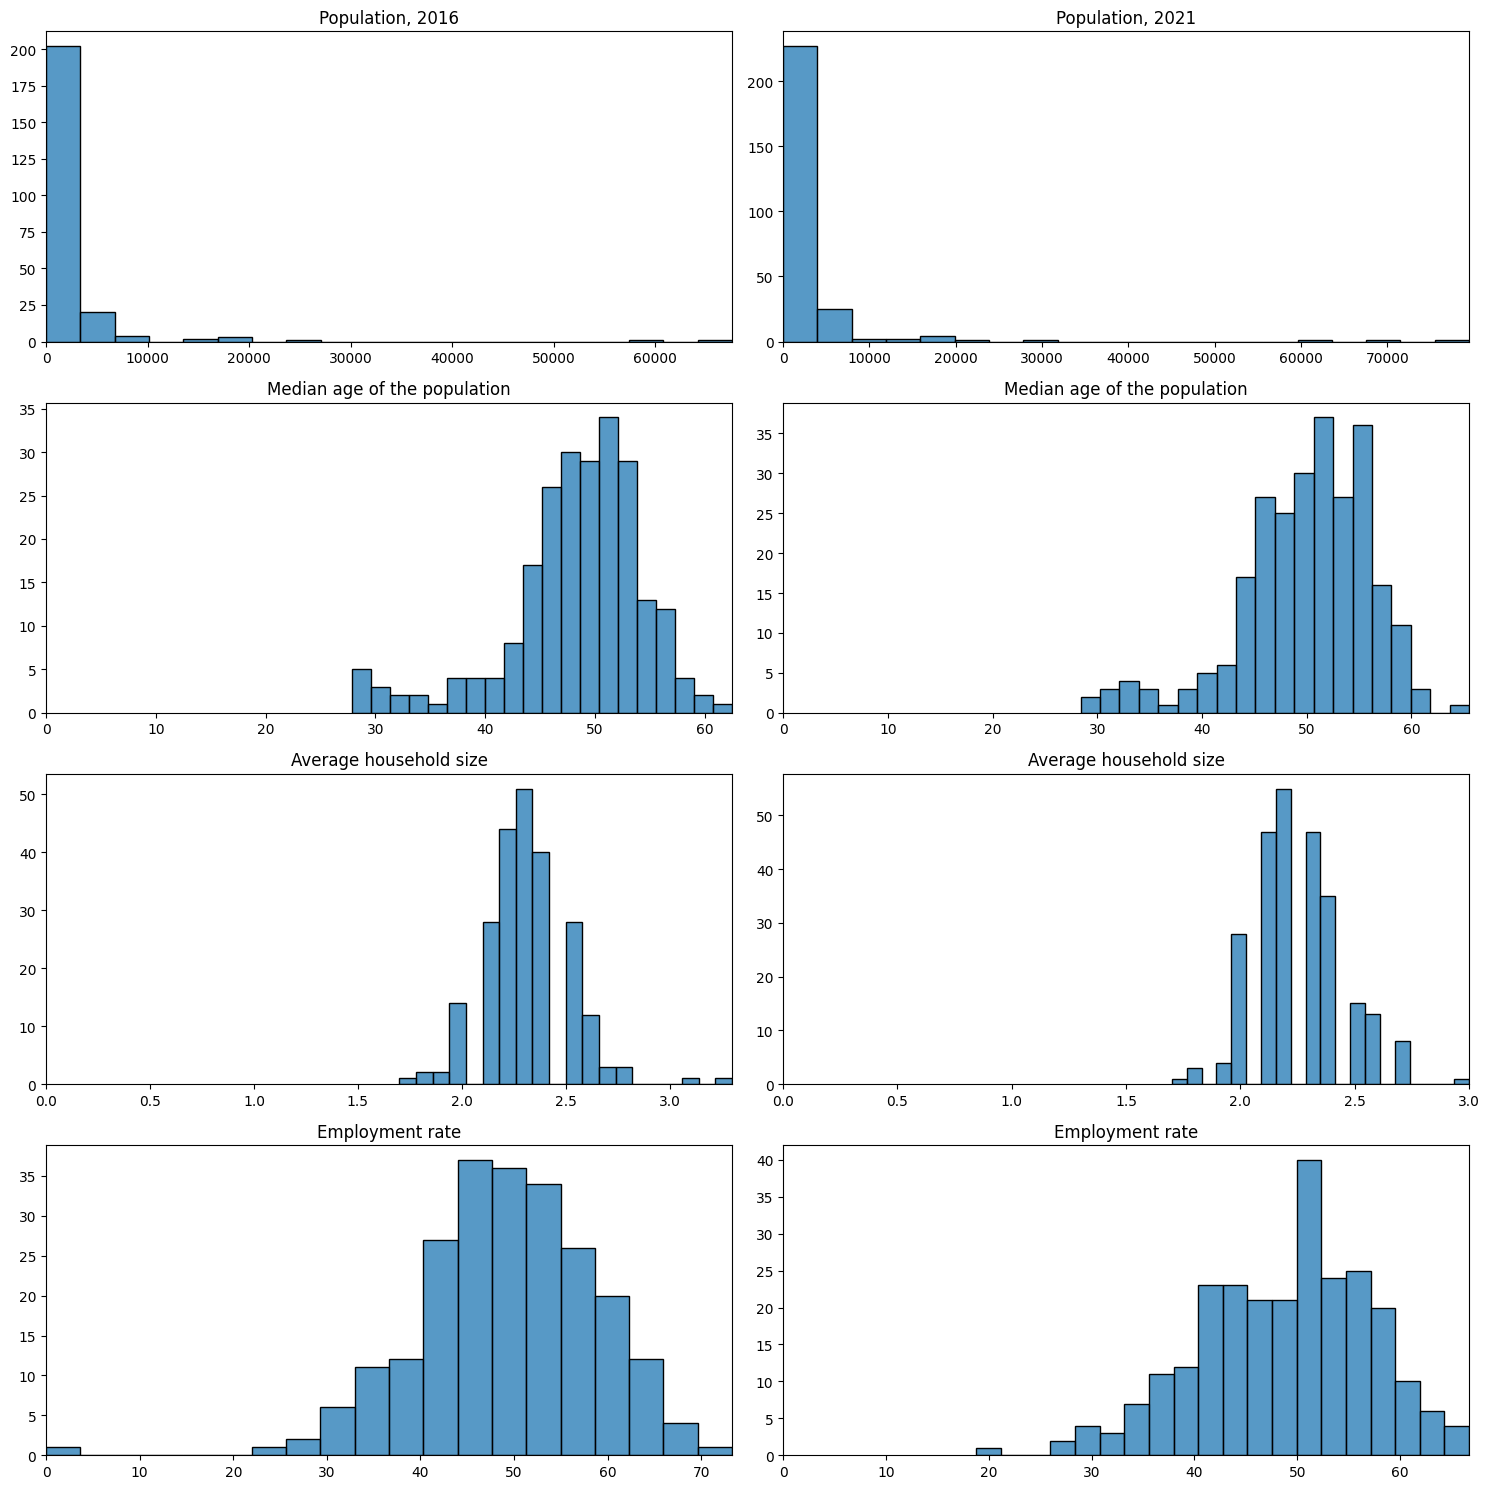

In [43]:
import seaborn as sns
# Finally, let's pick a few key characteristics to graph for both years
# We'll have a look at total population, median age, average household size, and employment rate

# First, we'll make a helper function to plot a single characteristic using seaborn
def plotCharacteristic(ax, df, colName, title):
    '''
    Plot a characteristic from a dataframe on a given axis

    Parameters:
    ax (Axis): The axis to plot on
    df (DataFrame): The dataframe to extract from
    colName (str): The column name to extract
    title (str): The title of the plot
    '''
    # Extract the data from the dataframe
    data = df[colName]
    # Remove any rows with NaN values
    data = data.dropna()
    # # Ensure the column is numeric
    # data = pd.to_numeric(data, errors = 'coerce')
    # Plot the data
    sns.histplot(data, ax=ax, bins=20)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(0, data.max())
    
# For 2016
colNames2016 = ['Population, 2016', 'Median age of the population', 'Average household size', 'Employment rate']
# The 2021 data has a different column name for a few characteristics, so let's build a separate list
colNames2021 = ['Population, 2021', 'Median age of the population', 'Average household size', 'Employment rate']

# We'll use matplotlib to create a grid of subplots to display the data
# and compare between years
fig, axs = plt.subplots(len(colNames2016), 2, figsize=(15, 15))
for i, col in enumerate(colNames2016):
    plotCharacteristic(axs[i, 0], communityDF2016, col, col)
    print('Row:', 0, 'Column:', 0)
    plotCharacteristic(axs[i, 1], communityDF2021, colNames2021[i], colNames2021[i])
plt.tight_layout()
# save the plot to a file
plt.savefig('./figures/Census_data_EDA.png')



In [45]:
# Let's have a look at the summary statistics for both datasets
communityDF2016.describe()

CHARACTERISTIC_NAME,% of owner households spending 30% or more of its income on shelter costs,% of owner households with a mortgage,% of tenant households in subsidized housing,% of tenant households spending 30% or more of its income on shelter costs,0 Management occupations,0 to 14 years,0 to 17 years,0 to 17 years (%),0 to 4 years,0 to 5 years,...,Total labour force population aged 15 years and over by occupation - National Occupational Classification (NOC) 2016 - 25% sample data,Total number of census families in private households - 100% data,Total population aged 15 years and over by work activity during the reference year - 25% sample data,Total visible minority population,Two-or-more person non-census-family households,Under 5 years,Unemployed,Unemployment rate,With employment income,Without employment income
count,213.000000,230.000000,230.000000,213.000000,230.000000,230.000000,214.000000,204.000000,230.000000,214.000000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,214.000000,214.000000
mean,7.980751,45.722609,5.681304,16.394836,112.456522,374.869565,477.827103,23.724020,115.826087,147.406542,...,1294.304348,761.913043,2101.847826,74.608696,37.108696,16.652174,151.826087,15.027391,1538.341121,711.752336
std,4.511584,16.274408,11.195533,18.411016,325.460621,998.697615,1238.873418,9.830282,322.699064,405.366499,...,3421.739508,1836.663137,5370.979817,494.539020,156.235075,66.879027,322.890081,8.638145,3834.163874,1722.805085
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,3.600000,0.000000,0.000000,...,10.000000,5.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,50.000000
25%,6.000000,41.125000,0.000000,0.000000,15.000000,75.000000,100.000000,16.700000,20.000000,30.000000,...,270.000000,195.000000,505.000000,0.000000,5.000000,0.000000,35.000000,9.375000,390.000000,216.250000
50%,8.700000,48.850000,0.000000,0.000000,35.000000,145.000000,187.500000,22.800000,45.000000,55.000000,...,512.500000,345.000000,942.500000,10.000000,10.000000,0.000000,80.000000,13.350000,645.000000,347.500000
75%,10.800000,54.875000,6.200000,31.800000,75.000000,265.000000,333.750000,29.625000,85.000000,100.000000,...,1032.500000,631.250000,1681.250000,20.000000,25.000000,15.000000,158.750000,19.275000,1197.500000,582.500000
max,17.800000,76.800000,57.100000,100.000000,3365.000000,10045.000000,12040.000000,58.300000,3245.000000,3955.000000,...,34150.000000,18730.000000,55455.000000,5840.000000,1750.000000,810.000000,3285.000000,66.700000,37170.000000,18280.000000


In [32]:
# Let's make a test dataframe with some numbers, some parseable strings, and some categorical dat
testData = {'GEO_NAME': ['A', 'B', 'C', 'D', 'E'],
            'CHARACTERISTIC_NAME': ['Population, 2016', 'Median age of the population', 'Average household size', 'Employment rate', 'Some characteristic'],
            'C1_COUNT_TOTAL': ['100', 40, '2.5', 0.6, 200]}

testDF = pd.DataFrame(testData)
testDF['C1_COUNT_TOTAL'] = pd.to_numeric(testDF['C1_COUNT_TOTAL'], errors='coerce')
print(testDF)
testDF.info()

# let's copy the 2016 dataset into another df
communityDF2016_copy = communityDF2016.copy()
# Now let's make the columns numeric where we can
communityDF2016_copy = communityDF2016_copy.apply(pd.to_numeric, errors='coerce')
# Let's see if that worked
communityDF2016_copy.head()

  GEO_NAME           CHARACTERISTIC_NAME  C1_COUNT_TOTAL
0        A              Population, 2016           100.0
1        B  Median age of the population            40.0
2        C        Average household size             2.5
3        D               Employment rate             0.6
4        E           Some characteristic           200.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GEO_NAME             5 non-null      object 
 1   CHARACTERISTIC_NAME  5 non-null      object 
 2   C1_COUNT_TOTAL       5 non-null      float64
dtypes: float64(1), object(2)
memory usage: 248.0+ bytes


CHARACTERISTIC_NAME,% of owner households spending 30% or more of its income on shelter costs,% of owner households with a mortgage,% of tenant households in subsidized housing,% of tenant households spending 30% or more of its income on shelter costs,0 Management occupations,0 to 14 years,0 to 17 years,0 to 17 years (%),0 to 4 years,0 to 5 years,...,Total labour force population aged 15 years and over by occupation - National Occupational Classification (NOC) 2016 - 25% sample data,Total number of census families in private households - 100% data,Total population aged 15 years and over by work activity during the reference year - 25% sample data,Total visible minority population,Two-or-more person non-census-family households,Under 5 years,Unemployed,Unemployment rate,With employment income,Without employment income
GEO_NAME,,,,,,,,,,,,,,,,,,,,,
Saint Martins,10.6,51.1,0.0,0.0,20.0,150.0,195.0,23.1,45.0,55.0,...,595.0,360.0,1035.0,0.0,10.0,0.0,90.0,15.0,640.0,345.0
St. Martins,NaN,52.9,0.0,NaN,10.0,30.0,40.0,25.0,5.0,5.0,...,80.0,75.0,195.0,0.0,5.0,0.0,20.0,25.0,145.0,105.0
Simonds,10.1,60.8,11.4,20.0,170.0,655.0,795.0,18.9,195.0,235.0,...,2060.0,1240.0,3185.0,35.0,30.0,0.0,245.0,11.9,2295.0,885.0
Saint John,14.4,61.3,15.7,36.4,2610.0,10045.0,12040.0,33.6,3245.0,3955.0,...,34150.0,18730.0,55455.0,4560.0,1505.0,530.0,3285.0,9.6,37170.0,18280.0
Musquash,7.4,52.1,0.0,0.0,30.0,180.0,220.0,15.9,60.0,70.0,...,595.0,380.0,1010.0,10.0,10.0,0.0,85.0,14.3,705.0,305.0


In [47]:
communityDF2016.describe()

CHARACTERISTIC_NAME,% of owner households spending 30% or more of its income on shelter costs,% of owner households with a mortgage,% of tenant households in subsidized housing,% of tenant households spending 30% or more of its income on shelter costs,0 Management occupations,0 to 14 years,0 to 17 years,0 to 17 years (%),0 to 4 years,0 to 5 years,...,Total labour force population aged 15 years and over by occupation - National Occupational Classification (NOC) 2016 - 25% sample data,Total number of census families in private households - 100% data,Total population aged 15 years and over by work activity during the reference year - 25% sample data,Total visible minority population,Two-or-more person non-census-family households,Under 5 years,Unemployed,Unemployment rate,With employment income,Without employment income
count,213.000000,230.000000,230.000000,213.000000,230.000000,230.000000,214.000000,204.000000,230.000000,214.000000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,214.000000,214.000000
mean,7.980751,45.722609,5.681304,16.394836,112.456522,374.869565,477.827103,23.724020,115.826087,147.406542,...,1294.304348,761.913043,2101.847826,74.608696,37.108696,16.652174,151.826087,15.027391,1538.341121,711.752336
std,4.511584,16.274408,11.195533,18.411016,325.460621,998.697615,1238.873418,9.830282,322.699064,405.366499,...,3421.739508,1836.663137,5370.979817,494.539020,156.235075,66.879027,322.890081,8.638145,3834.163874,1722.805085
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,3.600000,0.000000,0.000000,...,10.000000,5.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,50.000000
25%,6.000000,41.125000,0.000000,0.000000,15.000000,75.000000,100.000000,16.700000,20.000000,30.000000,...,270.000000,195.000000,505.000000,0.000000,5.000000,0.000000,35.000000,9.375000,390.000000,216.250000
50%,8.700000,48.850000,0.000000,0.000000,35.000000,145.000000,187.500000,22.800000,45.000000,55.000000,...,512.500000,345.000000,942.500000,10.000000,10.000000,0.000000,80.000000,13.350000,645.000000,347.500000
75%,10.800000,54.875000,6.200000,31.800000,75.000000,265.000000,333.750000,29.625000,85.000000,100.000000,...,1032.500000,631.250000,1681.250000,20.000000,25.000000,15.000000,158.750000,19.275000,1197.500000,582.500000
max,17.800000,76.800000,57.100000,100.000000,3365.000000,10045.000000,12040.000000,58.300000,3245.000000,3955.000000,...,34150.000000,18730.000000,55455.000000,5840.000000,1750.000000,810.000000,3285.000000,66.700000,37170.000000,18280.000000


In [48]:
communityDF2021.describe()

CHARACTERISTIC_NAME,"% of households living in a dwelling provided by the local government, First Nation or Indian band spending more than 30% on shelter costs",% of owner households spending 30% or more of its income on shelter costs,% of owner households with a mortgage,% of tenant households in subsidized housing,% of tenant households spending 30% or more of its income on shelter costs,0 Legislative and senior management occupations,0 to 14 years,0 to 17 years,0 to 17 years (%),0 to 4 years,...,Total - Visible minority for the population in private households - 25% sample data,Total number of census families in private households - 100% data,Total visible minority population,Two-maintainer household,Two-or-more-person non-census-family households,Under 5 years,Unemployed,Unemployment rate,With employment income,Without employment income
count,11.000000,234.000000,242.000000,212.000000,211.000000,257.000000,257.000000,248.000000,233.000000,257.000000,...,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,248.000000,248.000000
mean,0.754545,5.751709,47.464876,7.192925,12.157820,13.112840,432.042802,539.637097,17.400858,125.603113,...,2951.673152,881.945525,170.622568,580.505837,57.821012,21.264591,156.342412,12.594553,1749.334677,858.750000
std,2.029465,3.462196,10.519248,12.241043,14.325321,45.385059,1212.474231,1470.199548,7.691862,358.451703,...,7941.614984,2217.655608,1027.368073,1548.110345,242.598480,94.528311,404.480096,6.940853,4752.190637,2111.836329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.400000,0.000000,...,55.000000,15.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,115.000000,65.000000
25%,0.000000,4.225000,40.400000,0.000000,0.000000,0.000000,80.000000,110.000000,12.000000,25.000000,...,695.000000,220.000000,0.000000,120.000000,10.000000,0.000000,40.000000,8.300000,397.500000,233.750000
50%,0.000000,6.100000,48.550000,0.000000,0.000000,0.000000,165.000000,205.000000,16.000000,45.000000,...,1205.000000,365.000000,10.000000,220.000000,15.000000,0.000000,75.000000,11.400000,670.000000,387.500000
75%,0.000000,8.175000,54.200000,13.600000,25.000000,10.000000,300.000000,386.250000,22.100000,95.000000,...,2165.000000,680.000000,35.000000,435.000000,30.000000,15.000000,145.000000,15.500000,1282.500000,662.500000
max,6.700000,16.700000,75.900000,80.000000,66.700000,455.000000,12025.000000,14205.000000,48.000000,3570.000000,...,77405.000000,21270.000000,11545.000000,15380.000000,2655.000000,1055.000000,3895.000000,43.500000,46335.000000,19610.000000


In [55]:
# Next, we'll use the 2021 data to define our list of communities,
# and get the road networks from osmnx
import osmnx as ox
import networkx as nx

# We can use the index of our community dataframe for 2021
communityList = communityDF2021.index
# It's worth noting that the 2021 list includes the census subdivision
# type (eg. Parish, Town, City, etc.)
# The format is "Community Name, Census Subdivision Type"
# Let's count the commas to see if any communities have more than one
# comma in their name
commas = [community.count(',') for community in communityList]
if sum(commas) > len(communityList):
    print('Some communities have more than one comma in their name.')


In [57]:
# Looks like there are no communities with more than 1 comma, so let's split on the comma
communityList = [community.split(',')[0] for community in communityList]
print(communityList)

['Saint Martins', 'St. Martins', 'Simonds', 'Saint John', 'Musquash', 'Grand Manan', 'Campobello Island', 'West Isles', 'Lepreau', 'Pennfield', 'Blacks Harbour', 'Clarendon', 'Saint George', 'St. George', 'Saint Patrick', 'Saint Andrews', 'Saint Andrews', 'Saint Croix', 'Dufferin', 'Saint Stephen', 'St. Stephen', 'Saint James', 'Saint David', 'Dumbarton', 'Grand Manan', 'Blissville', 'Gladstone', 'Tracy', 'Fredericton Junction', 'Lincoln', 'Burton', 'Oromocto', 'Oromocto 26', 'Sheffield', 'Maugerville', 'Northfield', 'Petersville', 'Gagetown', 'Gagetown', 'Hampstead', 'Wickham', 'Cambridge', 'Cambridge-Narrows', 'Johnston', 'Brunswick', 'Waterborough', 'Canning', 'Minto', 'Chipman', 'Chipman', 'Hammond', 'Upham', 'Hampton', 'Hampton', 'Rothesay', 'Westfield', 'Kingston', 'Grand Bay-Westfield', 'Norton', 'Norton', 'Sussex', 'Sussex', 'Sussex Corner', 'Waterford', 'Cardwell', 'Havelock', 'Studholm', 'Springfield', 'Kars', 'Greenwich', 'Rothesay', 'Quispamsis', 'Hopewell', 'Riverside-Albe

In [100]:
# Now let's get the road networks for all the communities

roadNetworks = {}
# NOTE: THIS IS THE LONG WAY. IT SCRAPES EACH COMMUNITY FROM OSM INDIVIDUALLY
# SEE ./roadNetworks/ FOR THE SAVED NETWORKS
# for comm in communityList:
#     # We'll use the community name as the place name, 
#     # and add the rest of the info directly
#     placeName = comm + ', New Brunswick, Canada'
#     # We'll specifically use the 'drive' network type, as OSM is 
#     # more likely to be missing data on other types
#     # Let's also include some error handling in case the network can't be found
#     try:
#         G = ox.graph_from_place(placeName, network_type='drive')
#     except Exception as e:
#         print(f'Error getting road network for community: {comm}. Error: {e}')
#         continue
#     roadNetworks[comm] = G

# If road networks have been saved previously, we can load them from the
# roadNetworks directory instead of scraping them again.
# The files are saved as .graphml files, which can be loaded directly into osmnx

# We will load every file in the directory, and add it to the roadNetworks dictionary
# The file name is the community name with any spaces replaced by underscores
# The glob module will help us with this
import glob
for file in glob.glob('./roadNetworks/*.graphml'):
    # Extract the community name from the file name
    commName = file.split('\\')[-1].split('.')[0].replace('_', '/')
    # Load the graph from the file
    G = ox.load_graphml(file)
    roadNetworks[commName] = G


In [101]:
# Let's save each roadnetwork as a graphml file so we don't have to
# download them again
# for comm, G in roadNetworks.items():
#     # First let's remove any escape characters from the community name
#     comm = comm.replace('/', '_')
#     ox.save_graphml(G, f'./roadNetworks/{comm}.graphml')


Plotting road network for Hopewell


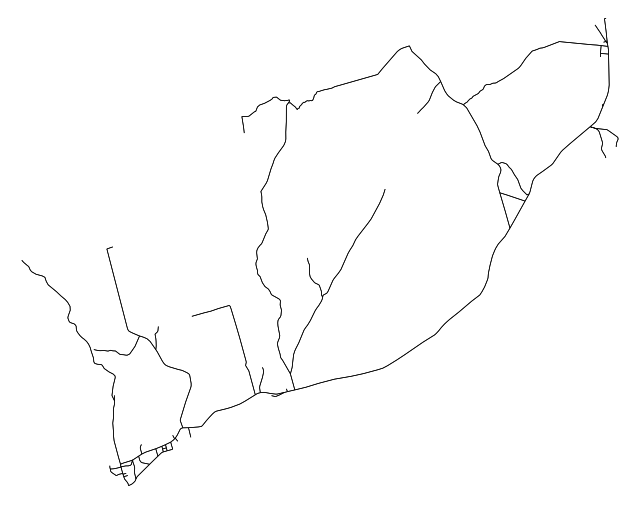

Plotting road network for Doaktown


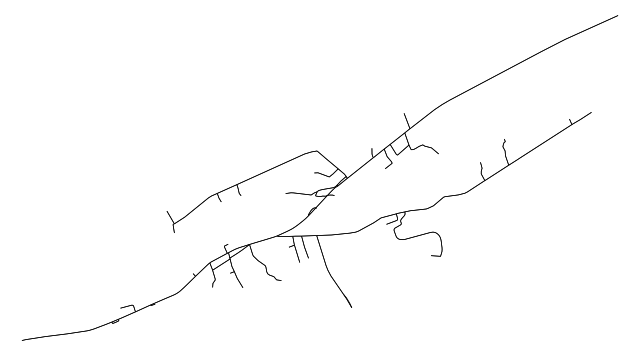

Plotting road network for Gagetown


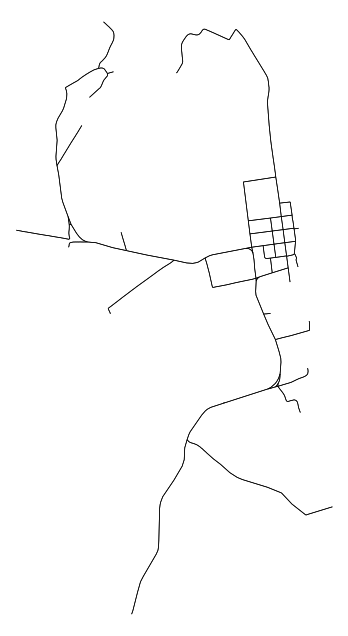

Plotting road network for Elgin


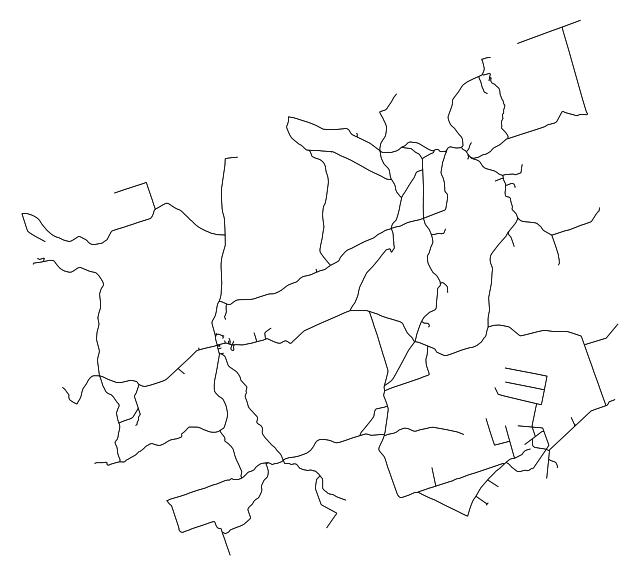

Plotting road network for Saint-Antoine


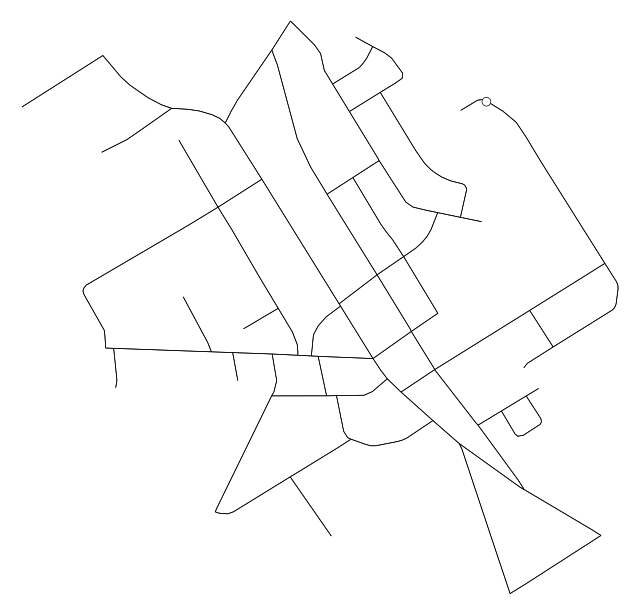

In [105]:
import random
# Let's plot some random road networks to see what they look like
# Let's get the list of keys with a road network
communityNetworks = list(roadNetworks.keys())
graphCount = 5
rand = random.sample(range(len(communityNetworks)), graphCount)
# Now we can plot the graphs
for value in rand:
    comm = communityNetworks[value]
    G = roadNetworks[comm]
    print(f'Plotting road network for {comm}')
    ox.plot_graph(G, node_size=0, edge_linewidth=0.5, edge_color='black', bgcolor= 'white')


In [ ]:
# Finally, we are ready to extract the road network characteristics
# for each community. We will use the following characteristics:
# - node connectivity
# - betweenness centrality
# - Average node degree

# We will use the networkx library to calculate these values
networkCharacteristics = {}


